# 1) Predict Delivery Time 

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import warnings 
import statsmodels.formula.api as smf
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv(r"C:\Users\Chinmay\Desktop\DA-DS\Assignment\DS\Assi. 4) Simple Linear Regrassion\delivery_time.csv")
df

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [3]:
df.describe()

,Delivery Time,Sorting Time
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [5]:
df.shape

(21, 2)

In [6]:
log = np.log(df)
log

,Delivery Time,Sorting Time
0,3.044522,2.302585
1,2.602690,1.386294
2,2.983153,1.791759
3,3.178054,2.197225
4,3.367296,2.302585
5,2.731115,1.791759
6,2.944439,1.945910
7,2.251292,1.098612
8,2.884801,2.302585
9,2.931194,2.197225


Text(0.5, 1.0, 'Log Data')

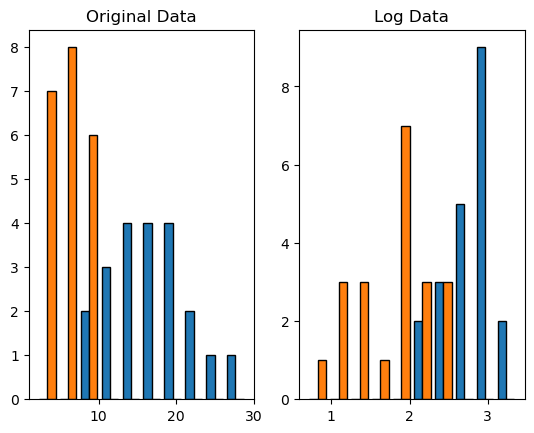

In [7]:
fig,axs = plt.subplots(1,2)
axs[0].hist(df,edgecolor = 'black')
axs[1].hist(log,edgecolor = 'black')
axs[0].set_title('Original Data')
axs[1].set_title('Log Data')

In [8]:
log.describe()

,Delivery Time,Sorting Time
count,21.000000,21.000000
mean,2.774787,1.728470
std,0.318219,0.467979
min,2.079442,0.693147
25%,2.602690,1.386294
50%,2.880882,1.791759
75%,2.983153,2.079442
max,3.367296,2.302585


In [9]:
log.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     float64
dtypes: float64(2)
memory usage: 464.0 bytes


In [10]:
log.shape

(21, 2)

In [11]:
# Feature Engineering
# Rename the columns log column
log = log.rename({'Delivery Time':'dt_log','Sorting Time':'st_log'},axis=True)
log

,dt_log,st_log
0,3.044522,2.302585
1,2.602690,1.386294
2,2.983153,1.791759
3,3.178054,2.197225
4,3.367296,2.302585
5,2.731115,1.791759
6,2.944439,1.945910
7,2.251292,1.098612
8,2.884801,2.302585
9,2.931194,2.197225


<AxesSubplot:xlabel='dt_log', ylabel='Density'>

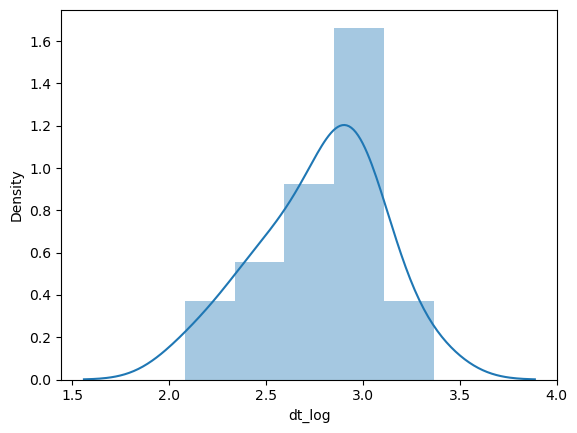

In [12]:
sns.distplot(log['dt_log'])

<AxesSubplot:xlabel='st_log', ylabel='Density'>

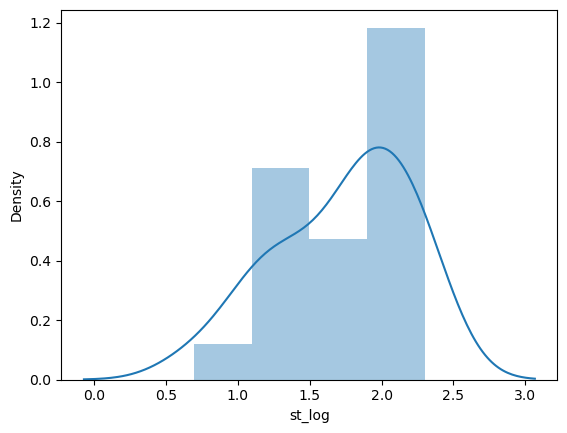

In [13]:
sns.distplot(log['st_log'])

<AxesSubplot:>

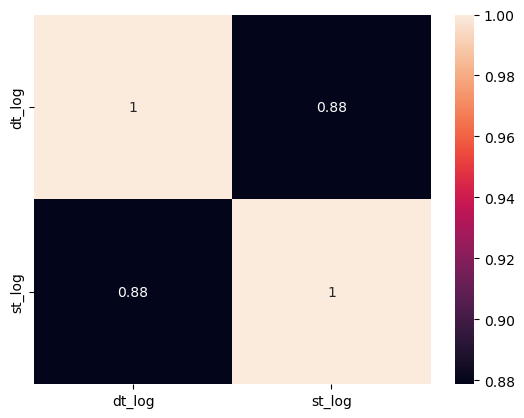

In [14]:
sns.heatmap(log.corr(),annot=True)

In [15]:
# Feature Engineering
# Rename the columns original column
df = df.rename({'Delivery Time':'dt','Sorting Time':'st'},axis=True)
df

,dt,st
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


<AxesSubplot:xlabel='dt', ylabel='Density'>

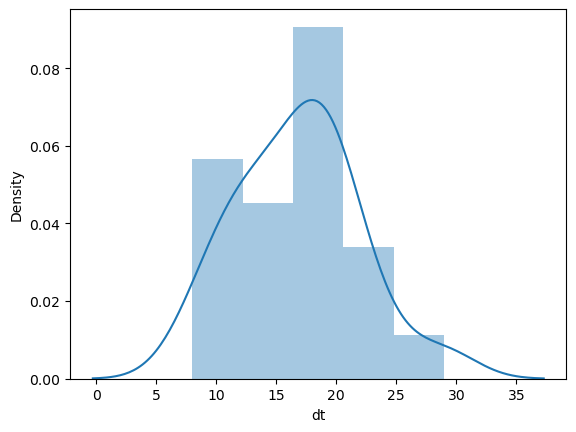

In [16]:
sns.distplot(df['dt'])

<AxesSubplot:xlabel='st', ylabel='Density'>

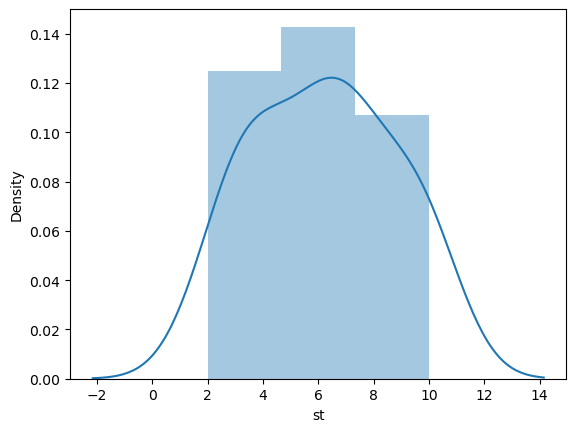

In [17]:
sns.distplot(df['st'])

<AxesSubplot:>

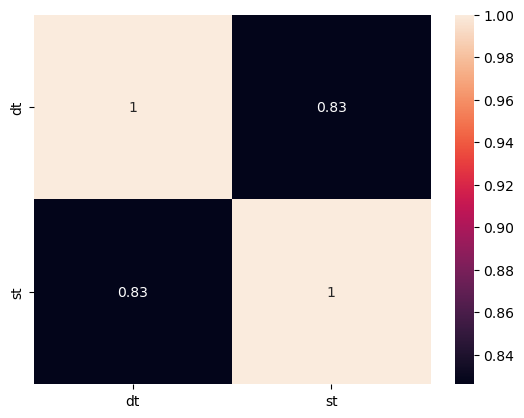

In [18]:
sns.heatmap(df.corr(),annot=True)

In [19]:
# Correaltion 
df.corr()

,dt,st
dt,1.000000,0.825997
st,0.825997,1.000000


In [20]:
log.corr()

,dt_log,st_log
dt_log,1.000000,0.878727
st_log,0.878727,1.000000


<AxesSubplot:xlabel='st', ylabel='dt'>

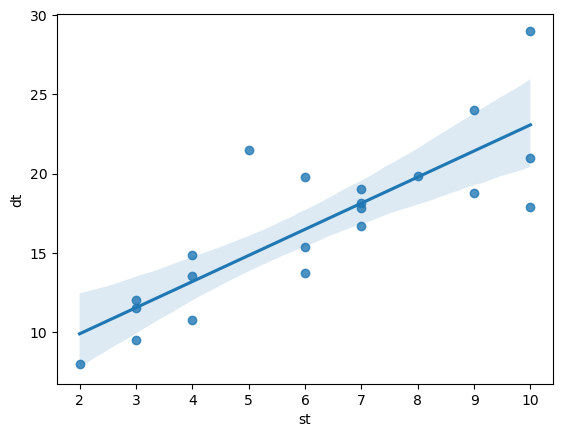

In [21]:
# Regrassion plot for original data 
sns.regplot(df['st'],df['dt'])

<AxesSubplot:xlabel='st_log', ylabel='dt_log'>

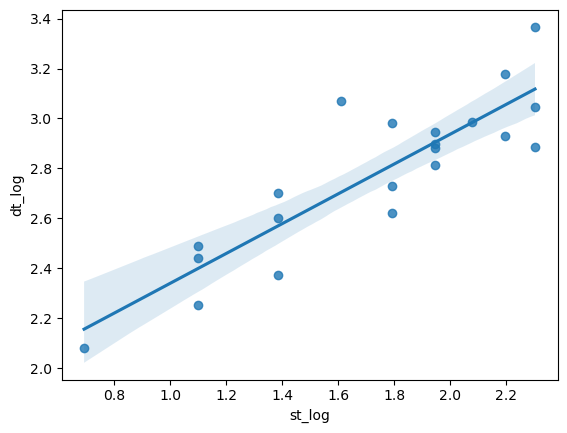

In [22]:
# Regrassion plot for log data 
sns.regplot(log['st_log'],log['dt_log'])

In [23]:
#Build Model 
model = smf.ols('dt~st',data = df).fit()
model

In [24]:
#Get Parameters
model.params

Intercept    6.582734
st           1.649020
dtype: float64

In [25]:
print(f'the value is {model.tvalues}\np-value is {model.pvalues}')

the value is Intercept    3.823349
st           6.387447
dtype: float64
p-value is Intercept    0.001147
st           0.000004
dtype: float64


In [26]:
print(model.rsquared,model.rsquared_adj)

0.6822714748417231 0.6655489208860244


In [27]:
d_t = (6.582734)+(1.649020)*7
d_t

18.125874

In [28]:
# Put new Data 
new_data = pd.Series([7,9])
new_data = pd.DataFrame(new_data,columns=['st'])
new_data

,st
0,7
1,9


In [29]:
# Prediction for new Data
model.predict(new_data)

0    18.125873
1    21.423913
dtype: float64

# 2) Model For Salary hike

In [30]:
df2 = pd.read_csv(r"C:\Users\Chinmay\Desktop\DA-DS\Assignment\DS\Assi. 4) Simple Linear Regrassion\Salary_Data.csv")
df2

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [31]:
df2.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [32]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [33]:
df2.shape

(30, 2)

In [46]:
log2 = np.log(df2)
log2

,YearsExperience,Salary
0,0.095310,10.580073
1,0.262364,10.740843
2,0.405465,10.538237
3,0.693147,10.681091
4,0.788457,10.593906
5,1.064711,10.944506
6,1.098612,11.004597
7,1.163151,10.904946
8,1.163151,11.073567
9,1.308333,10.954117


Text(0.5, 1.0, 'Log of data')

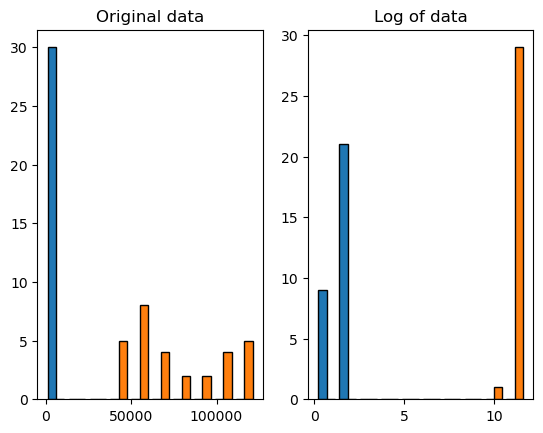

In [47]:
fig,axs = plt.subplots(1,2)
axs[0].hist(df2,edgecolor = 'black')
axs[1].hist(log2,edgecolor = 'black')
axs[0].set_title('Original data')
axs[1].set_title('Log of data')

<AxesSubplot:xlabel='YearsExperience', ylabel='Density'>

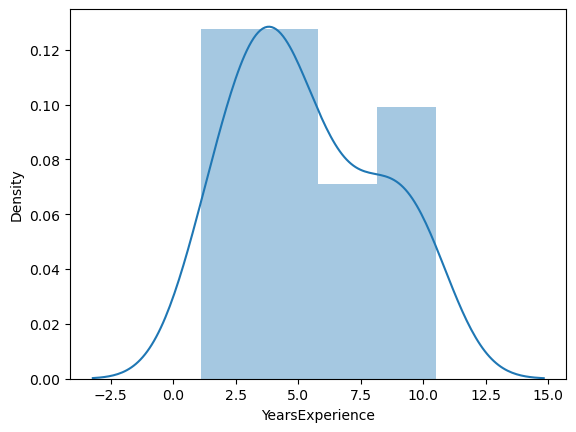

In [48]:
sns.distplot(df2['YearsExperience'])

<AxesSubplot:xlabel='Salary', ylabel='Density'>

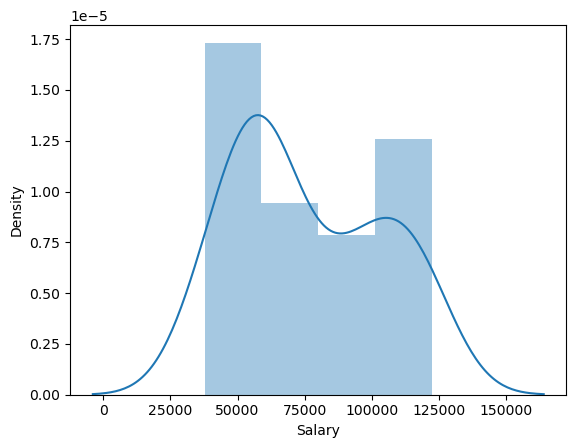

In [49]:
sns.distplot(df2['Salary'])

<AxesSubplot:>

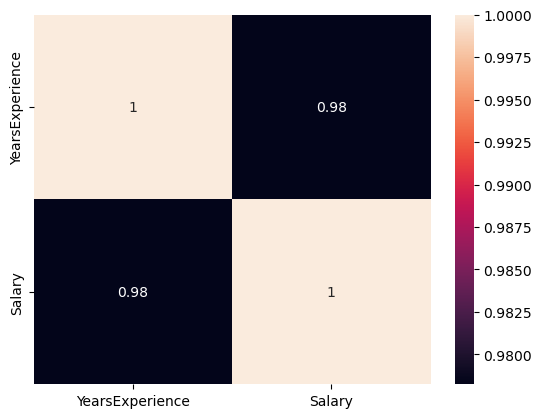

In [50]:
sns.heatmap(df2.corr(), annot=True)

<AxesSubplot:xlabel='YearsExperience', ylabel='Density'>

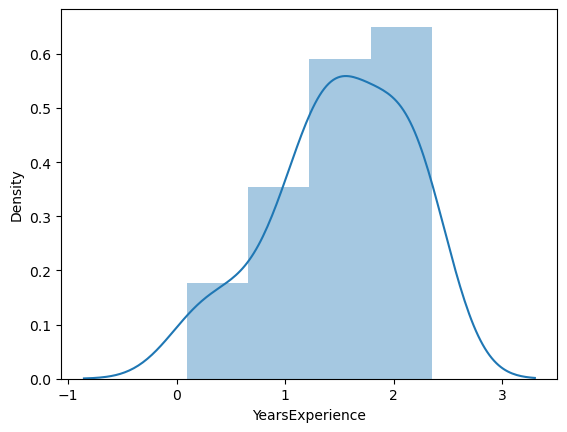

In [51]:
sns.distplot(log2['YearsExperience'])

<AxesSubplot:xlabel='Salary', ylabel='Density'>

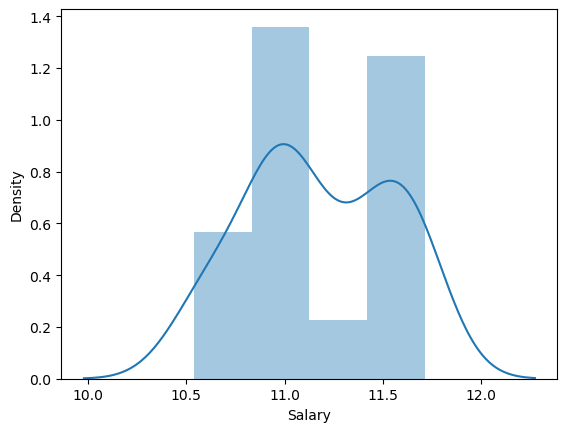

In [52]:
sns.distplot(log2['Salary'])

<AxesSubplot:>

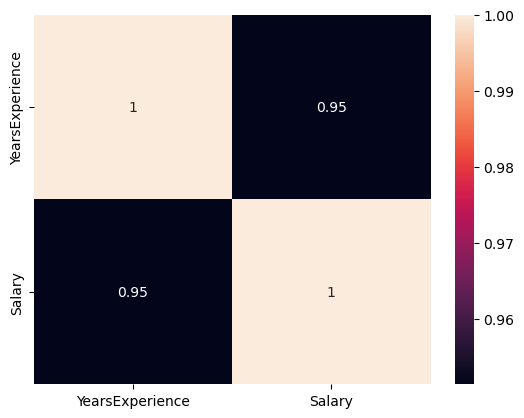

In [53]:
sns.heatmap(log2.corr(),annot=True)

In [54]:
# Correlation 
df2.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


<AxesSubplot:xlabel='YearsExperience', ylabel='Salary'>

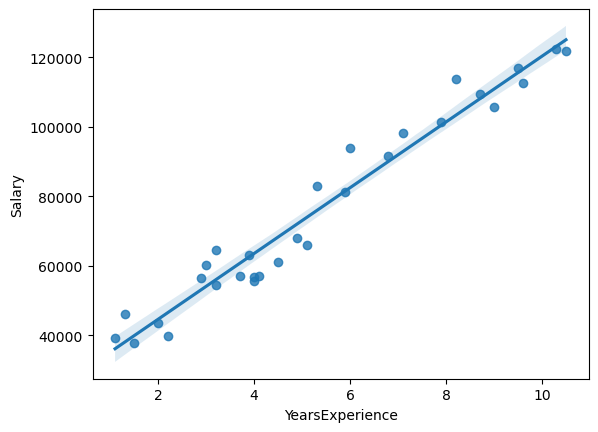

In [55]:
sns.regplot(df2['YearsExperience'],df2['Salary'])

<AxesSubplot:xlabel='YearsExperience', ylabel='Salary'>

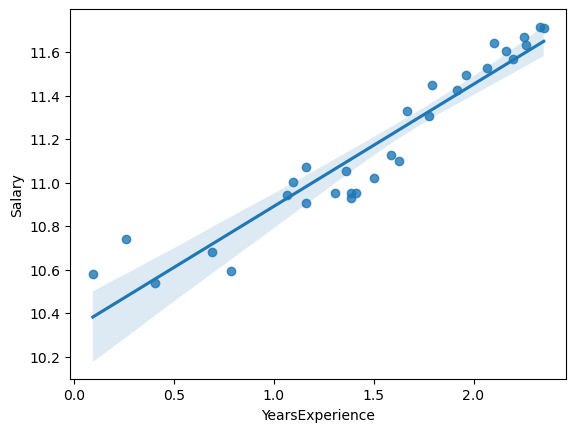

In [56]:
sns.regplot(log2['YearsExperience'],log2['Salary'])

In [59]:
# build model
model1 = smf.ols('Salary~YearsExperience',data=df2).fit()
model1

In [60]:
# Get Parameters
model1.params

Intercept          25792.200199
YearsExperience     9449.962321
dtype: float64

In [62]:
print(f'the value is {model1.tvalues}\-np value is {model1.pvalues}')

the value is Intercept          11.346940
YearsExperience    24.950094
dtype: float64\-np value is Intercept          5.511950e-12
YearsExperience    1.143068e-20
dtype: float64


In [63]:
print(model1.rsquared,model1.rsquared_adj)

0.9569566641435086 0.9554194021486339


In [65]:
#Line equation 
y =  (9449.962321)*(7)+25792.200199
y

91941.936446

In [74]:
# Predict for new data 
new_data2 = pd.Series([7,9])
new_data2 = pd.DataFrame(new_data2,columns=['YearsExperience'])
new_data2

,YearsExperience
0,7
1,9


In [75]:
model1.predict(new_data2)

0     91941.936449
1    110841.861092
dtype: float64